```
print "Hello World"
```

In [20]:
library(tseries)
library(urca)
library(corrplot)
library(urca)

Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
Warning message:
"package 'corrplot' was built under R version 3.6.1"corrplot 0.84 loaded


In [2]:
r = read.csv("C:/Users/Michael/Desktop/Suicide_df.csv", header=T, dec=",")
r <- as.data.frame(r)

In [3]:
r <- r[-1:-2, ]
rr <- as.matrix(r[3:8])
head(rr)

,Total,Male,Female,CPI_PCH,GNDI,UNRATE
3,10.5,17.8,4,2.19314,9.64E+12,4
4,10.4,17.7,4,3.36668,1.03E+13,3.9
5,10.7,18.2,4.1,2.81663,1.07E+13,5.7
6,10.9,18.5,4.2,1.59567,1.10E+13,6
7,10.8,18.1,4.2,2.298,1.15E+13,5.7
8,11,18.1,4.5,2.66757,1.22E+13,5.4


In [4]:
mode(rr) = "numeric"
data.frame(rr)

,Total,Male,Female,CPI_PCH,GNDI,UNRATE
3,10.5,17.8,4.0,2.19314,9.64e+12,4.0
4,10.4,17.7,4.0,3.36668,1.03e+13,3.9
5,10.7,18.2,4.1,2.81663,1.07e+13,5.7
6,10.9,18.5,4.2,1.59567,1.10e+13,6.0
7,10.8,18.1,4.2,2.29800,1.15e+13,5.7
8,11.0,18.1,4.5,2.66757,1.22e+13,5.4
9,10.9,18.1,4.4,3.36583,1.31e+13,4.9
10,11.0,18.1,4.5,3.22209,1.40e+13,4.4
11,11.3,18.5,4.6,2.87055,1.44e+13,5.0
12,11.6,19.0,4.8,3.81495,1.46e+13,7.3


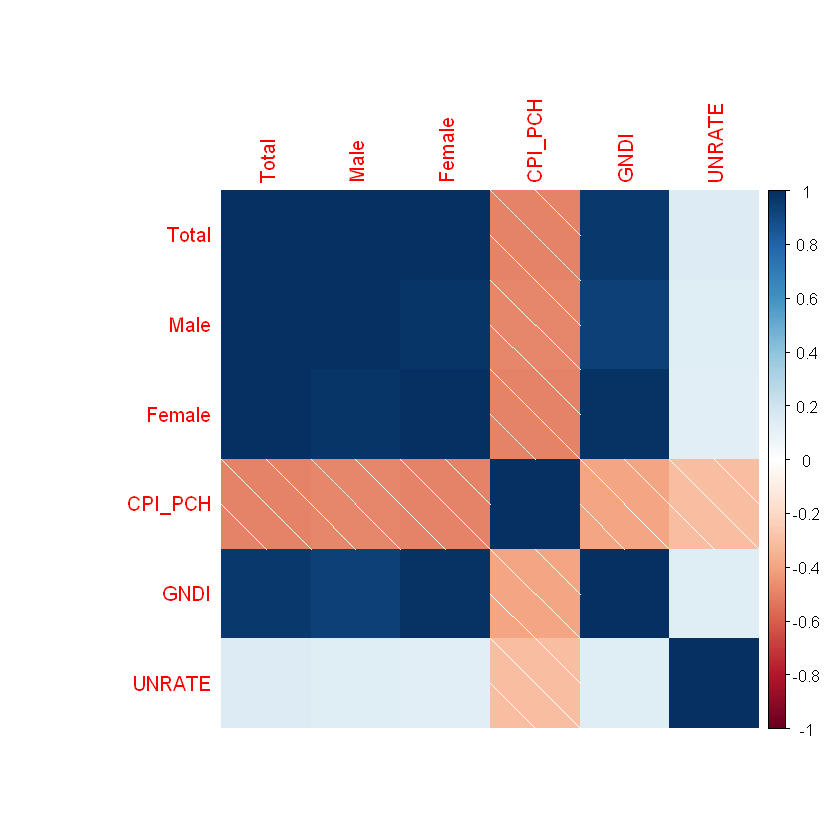

In [21]:
rr1 <- cor(rr)
corrplot(rr1, method = "shade")

In [6]:
Year = as.numeric(as.character(r$Year), na.action(r$Year))
Total <- as.numeric(as.character(r$Total), na.action(r$Total))
Male <- as.numeric(as.character(r$Male), na.action(r$Male))
Female <- as.numeric(as.character(r$Female), na.action(r$Female))
CPI <- as.numeric(as.character(r$CPI_PCH), na.action(r$CPI_PCH))
GNDI <- as.numeric(as.character(r$GNDI), na.action(r$GNDI))
UNRATE <- as.numeric(as.character(r$UNRATE), na.action(r$UNRATE))

In [7]:
# Use z-transformation to standardize values

Female2 <- (Female - mean(Female)) / sd(Female)
Male2 <- (Male - mean(Male)) / sd(Male)
Total2 <- (Total - mean(Total)) / sd(Total)
CPI2 <- (CPI - mean(CPI)) / sd(CPI)
GNDI2 <- (GNDI - mean(GNDI)) / sd(GNDI)
UNRATE2 <- (UNRATE - mean(UNRATE)) / sd(UNRATE)

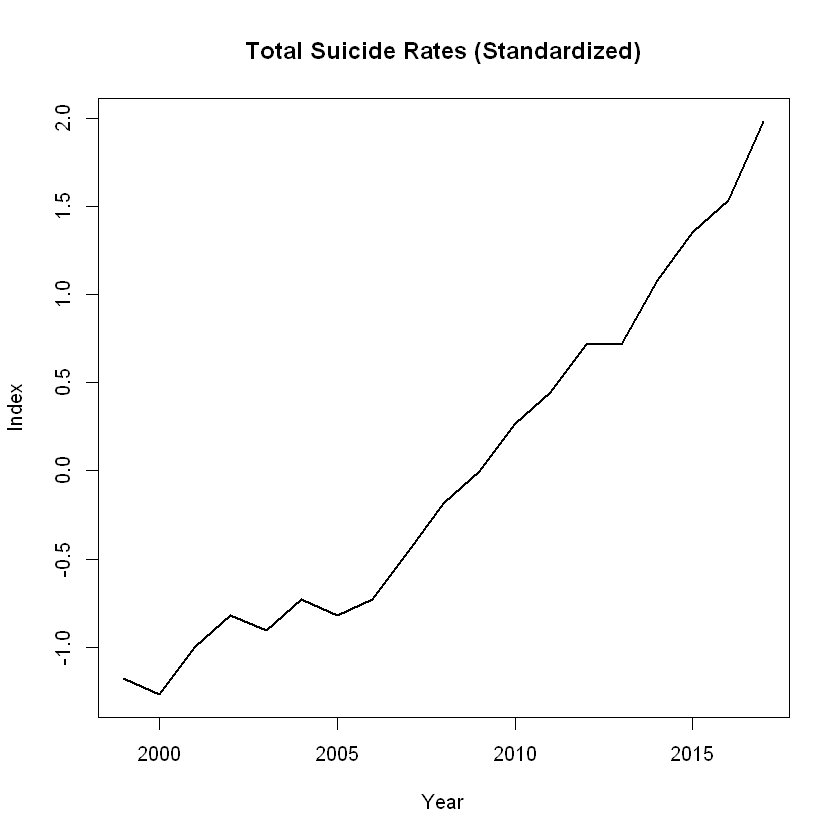

In [26]:
plot(Year, Total2,
     type = "l",
     lty = "solid",
     lwd = 2,
     col = "black",
     ylab = "Index",
     main = "Total Suicide Rates (Standardized)")

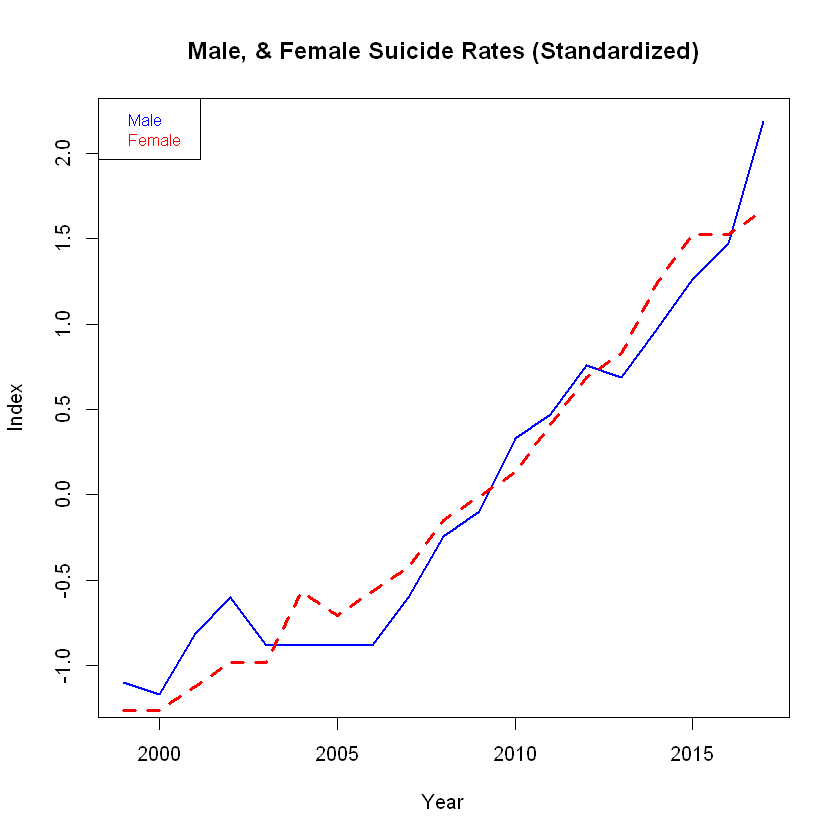

In [27]:
plot(Year, Male2,
     type = "l",
     lty = "solid",
     lwd = 2,
     col = "blue",
     ylab = "Index",
     main = "Male, & Female Suicide Rates (Standardized)")
lines(Year, Female2,
      lty = "dashed",
      col = "red",
      lwd = 3)
legend("topleft", c("Male", "Female"),
       text.col = c("blue", "red"),
       cex = 0.8)

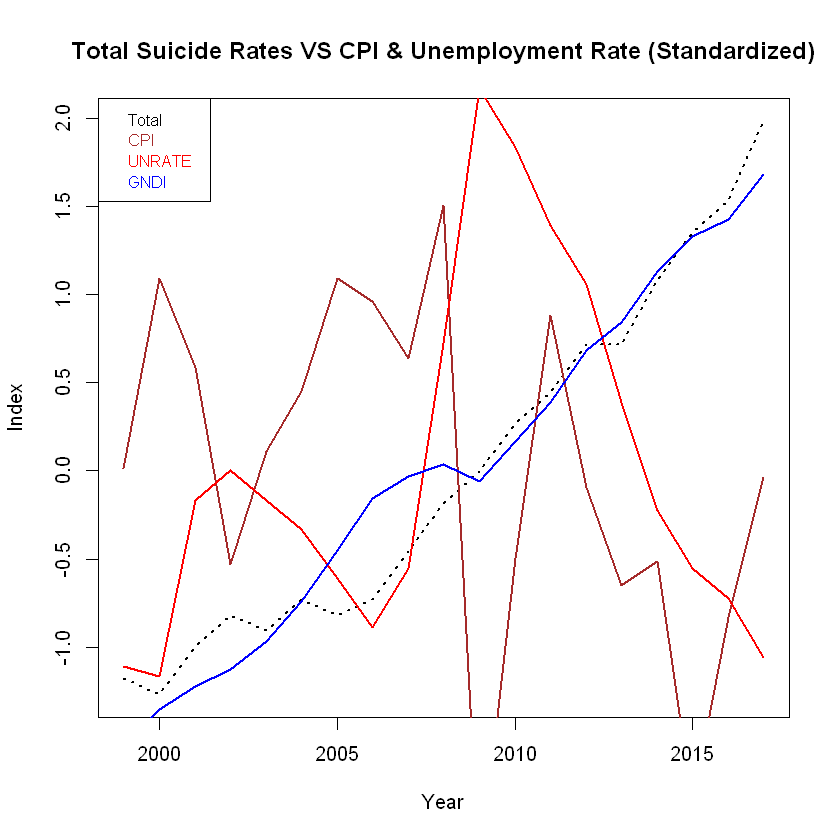

In [28]:
plot(Year, Total2,
     type = "l",
     lty = "dotted",
     lwd = 2,
     ylab = "Index",
     main = "Total Suicide Rates VS CPI & Unemployment Rate (Standardized)")
lines(Year, CPI2,
      lty = "solid",
      col = "brown",
      lwd = 2)
lines(Year, UNRATE2,
      lty = "solid",
      col = "red",
      lwd = 2)
lines(Year, GNDI2,
      lty = "solid",
      col = "blue",
      lwd = 2)
legend("topleft", c("Total", "CPI", "UNRATE", "GNDI"),
       text.col = c("black", "brown", "red", "blue"),
       cex = 0.8)

In [27]:
summary(ur.df(Total2, type = "drift", lags = 1))


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression drift 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.22254 -0.10141  0.04094  0.10381  0.15861 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.25348    0.05400   4.694 0.000345 ***
z.lag.1      0.09402    0.04298   2.188 0.046143 *  
z.diff.lag  -0.36331    0.26424  -1.375 0.190759    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1341 on 14 degrees of freedom
Multiple R-squared:  0.2602,	Adjusted R-squared:  0.1545 
F-statistic: 2.462 on 2 and 14 DF,  p-value: 0.1213


Value of test-statistic is: 2.1878 11.0568 

Critical values for test statistics: 
      1pct  5pct 10pct
tau2 -3.75 -3.00 -2.63
phi1  7.88  5.18  4.12


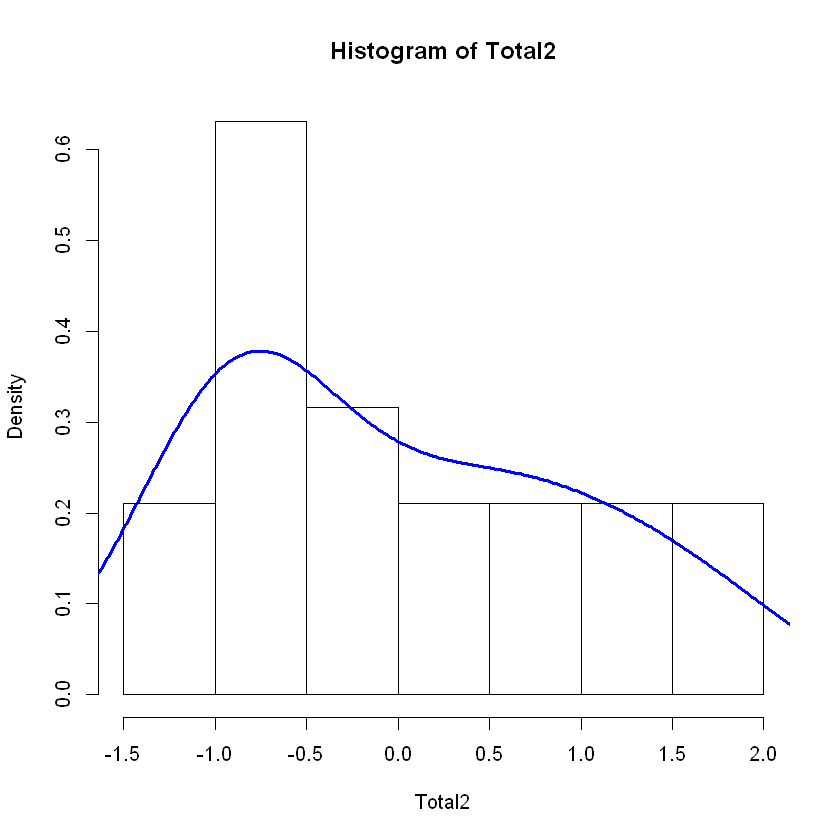

In [8]:
hist(Total2, freq = FALSE)
lines(density(Total2), lwd=3, col="blue")

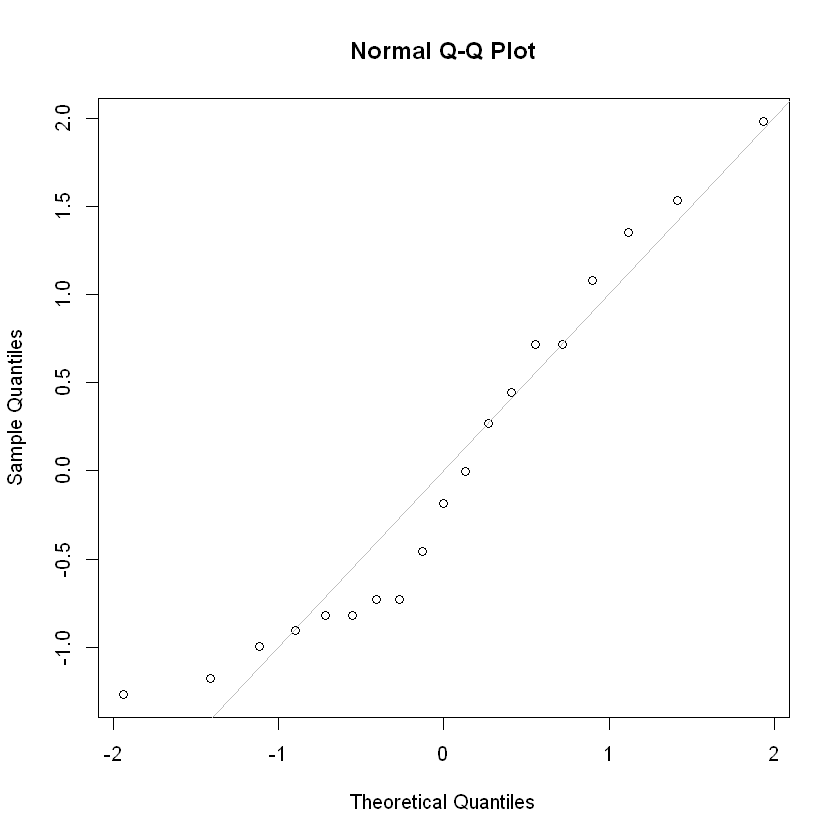

In [9]:
qqnorm(Total2)
abline(a=0, b=1, col='grey')

In [37]:
summary(ur.df(CPI2, type = "trend", lags = 1))


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.97807 -0.27535  0.08012  0.44222  1.75490 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  1.15362    0.66995   1.722  0.10877   
z.lag.1     -1.35230    0.38482  -3.514  0.00381 **
tt          -0.12028    0.06212  -1.936  0.07488 . 
z.diff.lag   0.31021    0.26233   1.183  0.25817   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.9732 on 13 degrees of freedom
Multiple R-squared:  0.5542,	Adjusted R-squared:  0.4513 
F-statistic: 5.387 on 3 and 13 DF,  p-value: 0.01247


Value of test-statistic is: -3.5141 4.1997 6.2365 

Critical values for test statistics: 
      1pct  5pct 10pct
tau3 -4.38 -3.60 -3.24
phi2  8.21  5.

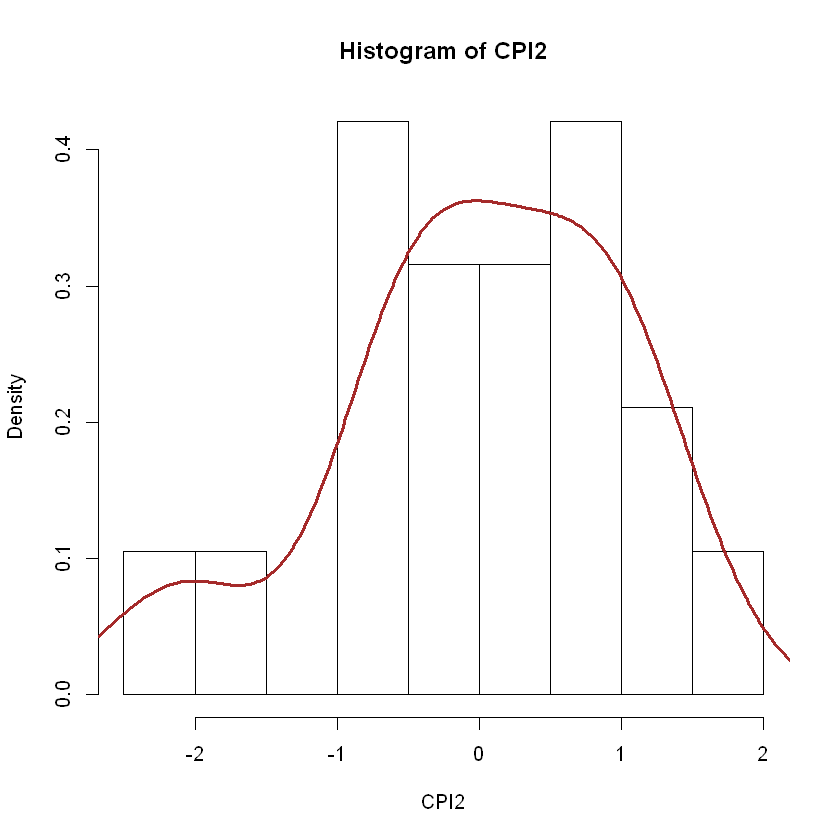

In [12]:
hist(CPI2, freq = FALSE)
lines(density(CPI2), lwd=3, col="brown")

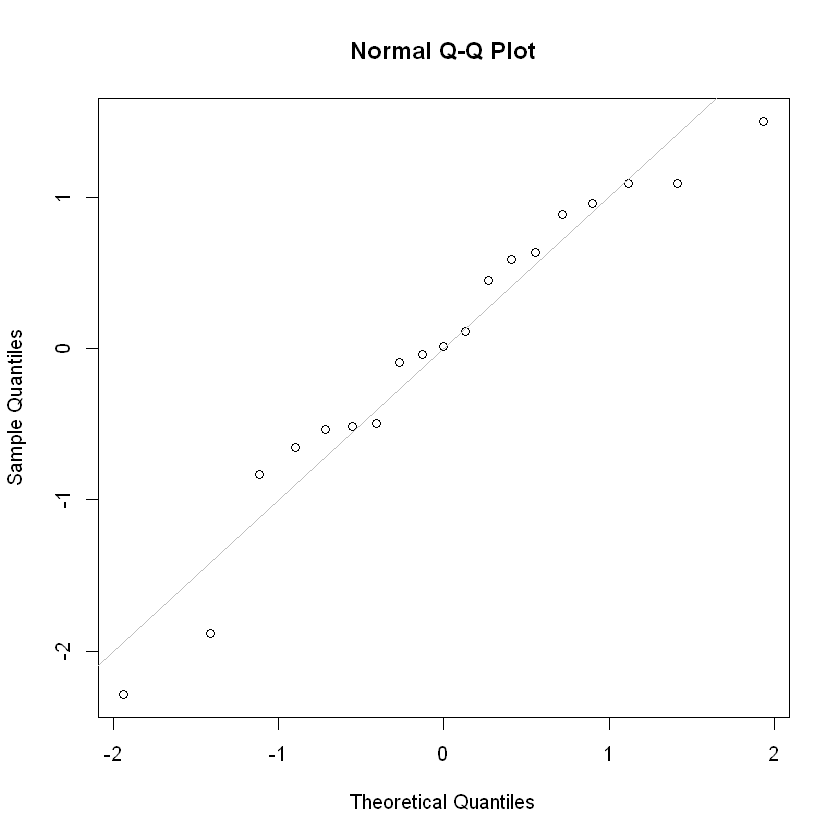

In [13]:
qqnorm(CPI2)
abline(a=0, b=1, col='grey')

In [36]:
summary(ur.df(GNDI2, type = "drift", lags = 1))


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression drift 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.25200 -0.05928  0.01115  0.09210  0.10880 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  0.14109    0.05344   2.640   0.0194 *
z.lag.1      0.01020    0.03028   0.337   0.7413  
z.diff.lag   0.21291    0.26530   0.803   0.4357  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1074 on 14 degrees of freedom
Multiple R-squared:  0.05552,	Adjusted R-squared:  -0.0794 
F-statistic: 0.4115 on 2 and 14 DF,  p-value: 0.6704


Value of test-statistic is: 0.3367 3.4888 

Critical values for test statistics: 
      1pct  5pct 10pct
tau2 -3.75 -3.00 -2.63
phi1  7.88  5.18  4.12


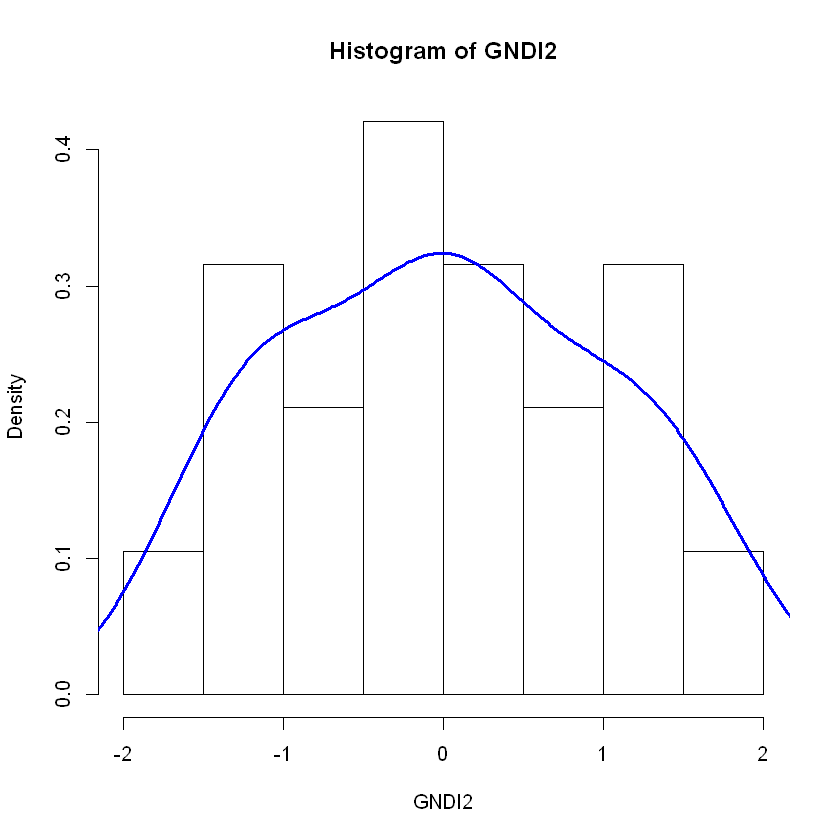

In [15]:
hist(GNDI2, freq = FALSE)
lines(density(GNDI2), lwd=3, col="blue")

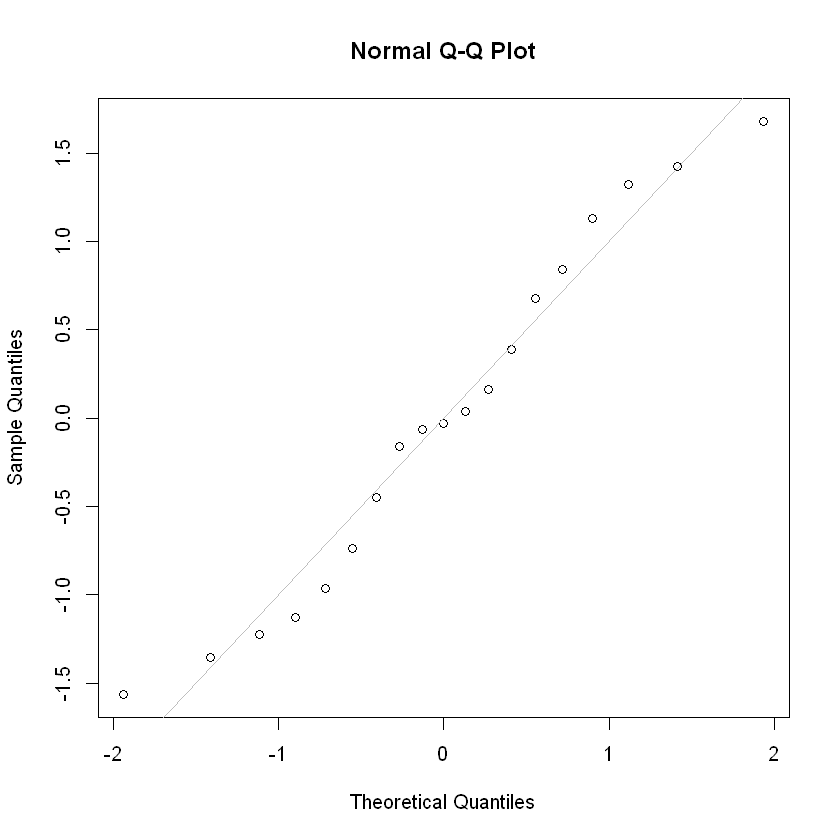

In [16]:
qqnorm(GNDI2)
abline(a=0, b=1, col='grey')

In [38]:
summary(ur.df(UNRATE2, type = "none", lags = 1))


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.53390 -0.28253 -0.09968  0.38290  0.87816 

Coefficients:
           Estimate Std. Error t value Pr(>|t|)   
z.lag.1     -0.3347     0.1253  -2.672  0.01740 * 
z.diff.lag   0.6410     0.1952   3.284  0.00502 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4749 on 15 degrees of freedom
Multiple R-squared:  0.4839,	Adjusted R-squared:  0.4151 
F-statistic: 7.032 on 2 and 15 DF,  p-value: 0.007007


Value of test-statistic is: -2.6724 

Critical values for test statistics: 
      1pct  5pct 10pct
tau1 -2.66 -1.95  -1.6


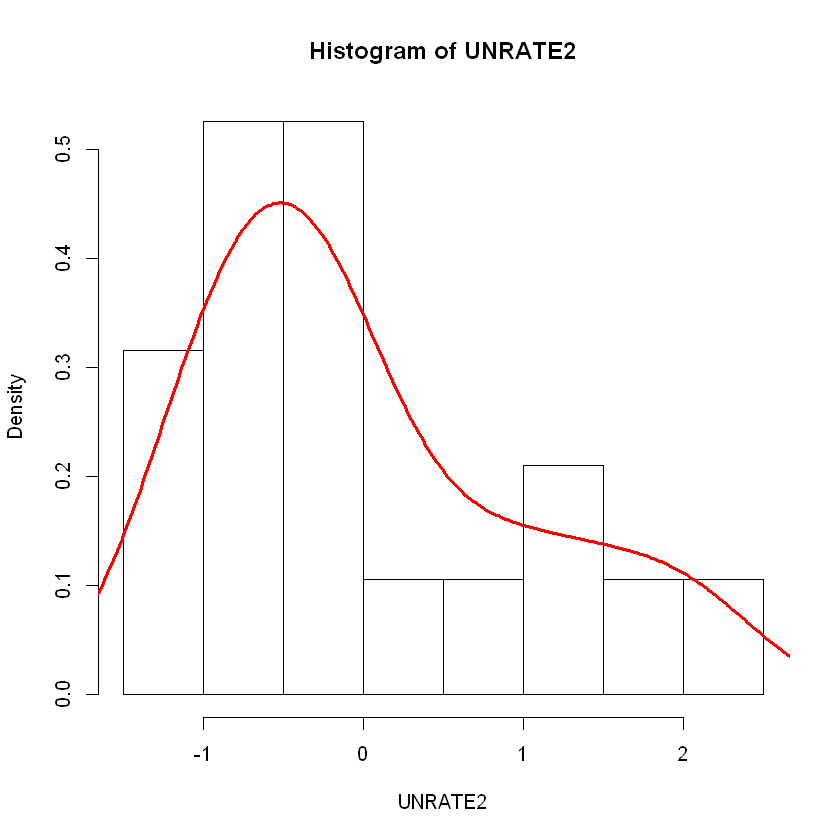

In [32]:
hist(UNRATE2, freq = FALSE)
lines(density(UNRATE2), lwd=3, col="red")

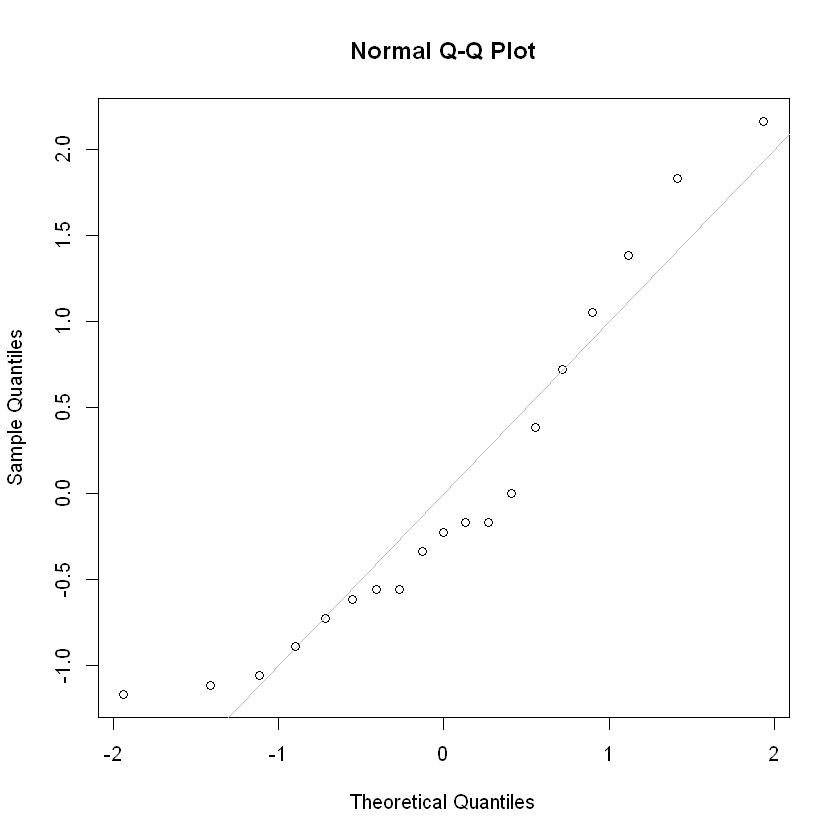

In [33]:
qqnorm(UNRATE2)
abline(a=0, b=1, col='grey')

In [34]:
# Perform Johansen's Co-Integration longrun test
jotest <- ca.jo(data.frame(Total2, CPI2, GNDI2, UNRATE2), type = "trace", K=2, spec = "longrun")
summary(jotest)


###################### 
# Johansen-Procedure # 
###################### 

Test type: trace statistic , with linear trend 

Eigenvalues (lambda):
[1] 0.66978737 0.60722360 0.45152176 0.06986273

Values of teststatistic and critical values of test:

          test 10pct  5pct  1pct
r <= 3 |  1.23  6.50  8.18 11.65
r <= 2 | 11.44 15.66 17.95 23.52
r <= 1 | 27.33 28.71 31.52 37.22
r = 0  | 46.16 45.23 48.28 55.43

Eigenvectors, normalised to first column:
(These are the cointegration relations)

            Total2.l2     CPI2.l2   GNDI2.l2  UNRATE2.l2
Total2.l2   1.0000000  1.00000000  1.0000000  1.00000000
CPI2.l2    -1.4614892  0.33862138  0.4430094  0.01485417
GNDI2.l2   -1.0143616 -0.53740306 -1.2084291 -0.87722353
UNRATE2.l2  0.3777609  0.04505636  0.1601470 -0.25391449

Weights W:
(This is the loading matrix)

            Total2.l2      CPI2.l2    GNDI2.l2  UNRATE2.l2
Total2.d  -0.01735264  0.160643409 -0.21596512 -0.04352703
CPI2.d     0.34965478 -2.933573090 -0.18129533 -0.27852779